<a href="https://colab.research.google.com/github/ateyodin/Lesson-1/blob/master/Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework**

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


**Adding everything we need**

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

**Getting Data**

In [0]:
path = untar_data(URLs.MNIST); path

PosixPath('/content/data/mnist_png')

**Cheking everything inside folders**

In [0]:
path.ls()

[PosixPath('/content/data/mnist_png/testing'),
 PosixPath('/content/data/mnist_png/training')]

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, train='training', valid='testing', ds_tfms=tfms, size=25) 
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (60000 items)
x: ImageList
Image (3, 25, 25),Image (3, 25, 25),Image (3, 25, 25),Image (3, 25, 25),Image (3, 25, 25)
y: CategoryList
6,6,6,6,6
Path: /content/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 25, 25),Image (3, 25, 25),Image (3, 25, 25),Image (3, 25, 25),Image (3, 25, 25)
y: CategoryList
6,6,6,6,6
Path: /content/data/mnist_png;

Test: None

**Show**

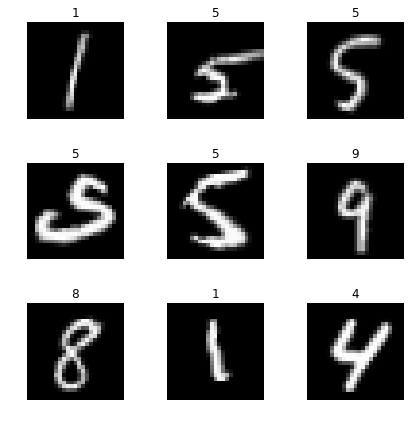

In [0]:
data.show_batch(rows=3, figsize=(6,6))

**Checking classes**

In [0]:
print(data.classes)
len(data.classes),data.c

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


(10, 10)

**Training using resnet34 - run for 4 epochs**

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.595556,0.330717,0.106400,14:29
1,0.251771,0.119217,0.036500,14:20
2,0.188307,0.082752,0.025200,14:33
3,0.154421,0.075391,0.024100,14:29


In [0]:
learn.save('stage-1')

**Results showing our predictions, actual number, loss and probability**

In [0]:
interpretation = ClassificationInterpretation.from_learner(learn)

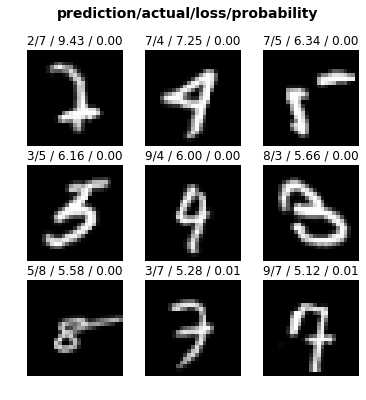

In [34]:
interpretation.plot_top_losses(9, figsize=(6,6))

**Confusion matrix to check wich combinations makes most mistakes**

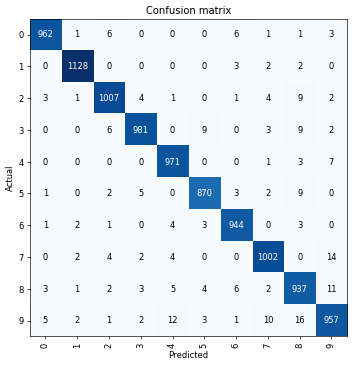

In [35]:
interpretation.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [36]:
interpretation.most_confused(min_val=2)

[('9', '8', 16),
 ('7', '9', 14),
 ('9', '4', 12),
 ('8', '9', 11),
 ('9', '7', 10),
 ('2', '8', 9),
 ('3', '5', 9),
 ('3', '8', 9),
 ('5', '8', 9),
 ('4', '9', 7),
 ('0', '2', 6),
 ('0', '6', 6),
 ('3', '2', 6),
 ('8', '6', 6),
 ('5', '3', 5),
 ('8', '4', 5),
 ('9', '0', 5),
 ('2', '3', 4),
 ('2', '7', 4),
 ('6', '4', 4),
 ('7', '2', 4),
 ('7', '4', 4),
 ('8', '5', 4),
 ('0', '9', 3),
 ('1', '6', 3),
 ('2', '0', 3),
 ('3', '7', 3),
 ('4', '8', 3),
 ('5', '6', 3),
 ('6', '5', 3),
 ('6', '8', 3),
 ('8', '0', 3),
 ('8', '3', 3),
 ('9', '5', 3),
 ('1', '7', 2),
 ('1', '8', 2),
 ('2', '9', 2),
 ('3', '9', 2),
 ('5', '2', 2),
 ('5', '7', 2),
 ('6', '1', 2),
 ('7', '1', 2),
 ('7', '3', 2),
 ('8', '2', 2),
 ('8', '7', 2),
 ('9', '1', 2),
 ('9', '3', 2)]

**Learning rate**

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


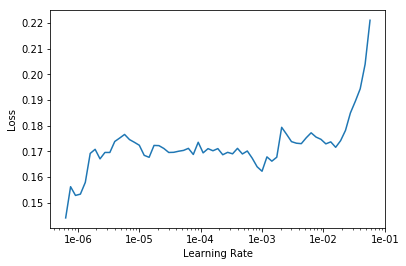

In [37]:
learn.lr_find()
learn.recorder.plot()

**Retraining model**

In [0]:
learn.unfreeze()

In [40]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.054340,0.020980,0.006900,39:40


In [0]:
learn.load('stage-1');

In [42]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.145150,0.055270,0.017300,30:43
1,0.120960,0.049664,0.015300,31:35


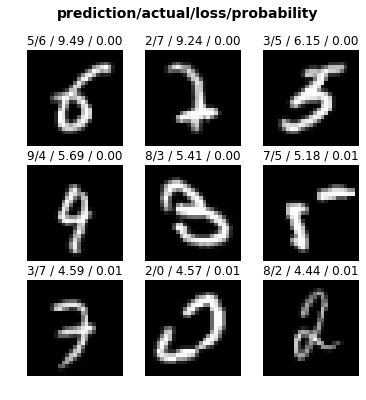

In [43]:
interpretation = ClassificationInterpretation.from_learner(learn)
interpretation.plot_top_losses(9,figsize=(6,6))

**Plot top loss (left to right) is showing a 6 a 7 and a 5 and our model has a 5 a 2 and 3 that was incorrect**

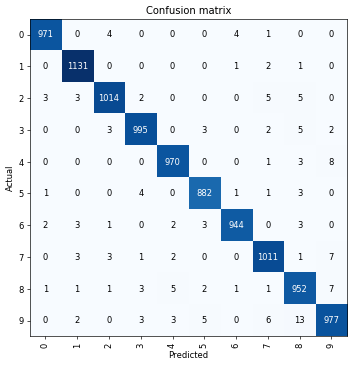

In [44]:
interpretation.plot_confusion_matrix(figsize=(6,6),dpi=60)

**We can see a high match rate in the confusion matrix between predicted and actual numbers. looks like number 9 has been mistaken for a 8 a couple of times**

In [45]:
interpretation.most_confused(min_val=2)

[('9', '8', 13),
 ('4', '9', 8),
 ('7', '9', 7),
 ('8', '9', 7),
 ('9', '7', 6),
 ('2', '7', 5),
 ('2', '8', 5),
 ('3', '8', 5),
 ('8', '4', 5),
 ('9', '5', 5),
 ('0', '2', 4),
 ('0', '6', 4),
 ('5', '3', 4),
 ('2', '0', 3),
 ('2', '1', 3),
 ('3', '2', 3),
 ('3', '5', 3),
 ('4', '8', 3),
 ('5', '8', 3),
 ('6', '1', 3),
 ('6', '5', 3),
 ('6', '8', 3),
 ('7', '1', 3),
 ('7', '2', 3),
 ('8', '3', 3),
 ('9', '3', 3),
 ('9', '4', 3),
 ('1', '7', 2),
 ('2', '3', 2),
 ('3', '7', 2),
 ('3', '9', 2),
 ('6', '0', 2),
 ('6', '4', 2),
 ('7', '4', 2),
 ('8', '5', 2),
 ('9', '1', 2)]